# Conversion Rate 

## Goal
 Build a model that predicts conversion rate and base on the model, come up with ideas to improve revenue 

In [25]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [26]:
#Check First 5 rows of the dataset 
df=pd.read_csv("conversion_data.csv")
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [28]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [29]:
for column in df.columns: 
    uniques=sorted(df[column].unique())
    print('{0:18s}{1:6d}\t'.format(column, len(uniques)),uniques[0:6])

country                4	 ['China', 'Germany', 'UK', 'US']
age                   60	 [17, 18, 19, 20, 21, 22]
new_user               2	 [0, 1]
source                 3	 ['Ads', 'Direct', 'Seo']
total_pages_visited    29	 [1, 2, 3, 4, 5, 6]
converted              2	 [0, 1]


## Remove Outliers 

The age of 123 seems unrealistic, check the age that over 90 

In [30]:
df[df['age']>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1



There are only two records that age over 90, we can just removed them.

In [31]:
df=df[df['age']<90]


## Exploratory Data Analysis 

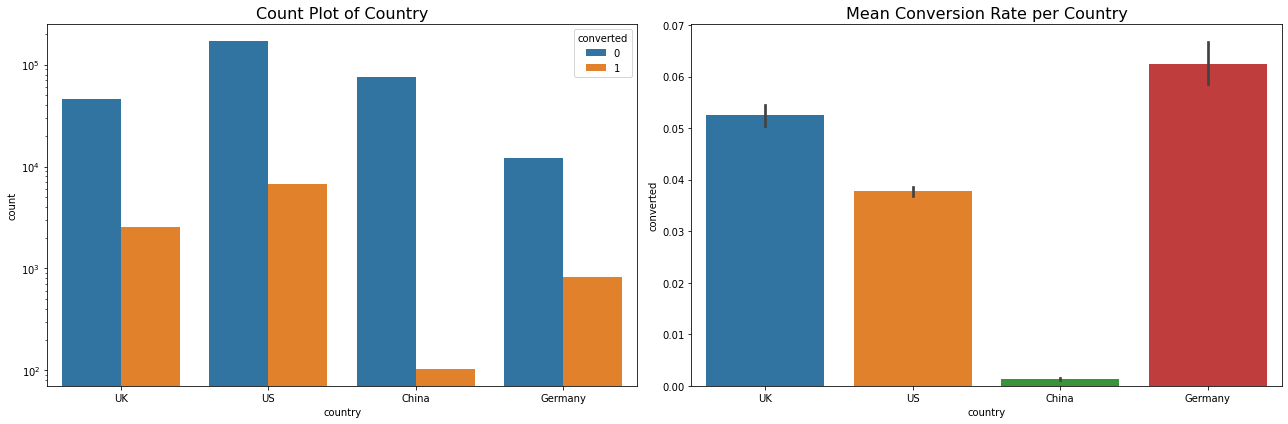

In [32]:
# Visualization of different countries
grouped=df[['country','converted']].groupby('country').mean().reset_index()
fix,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='country',hue='converted',data=df,ax=ax[0])
ax[0].set_title('Count Plot of Country',fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

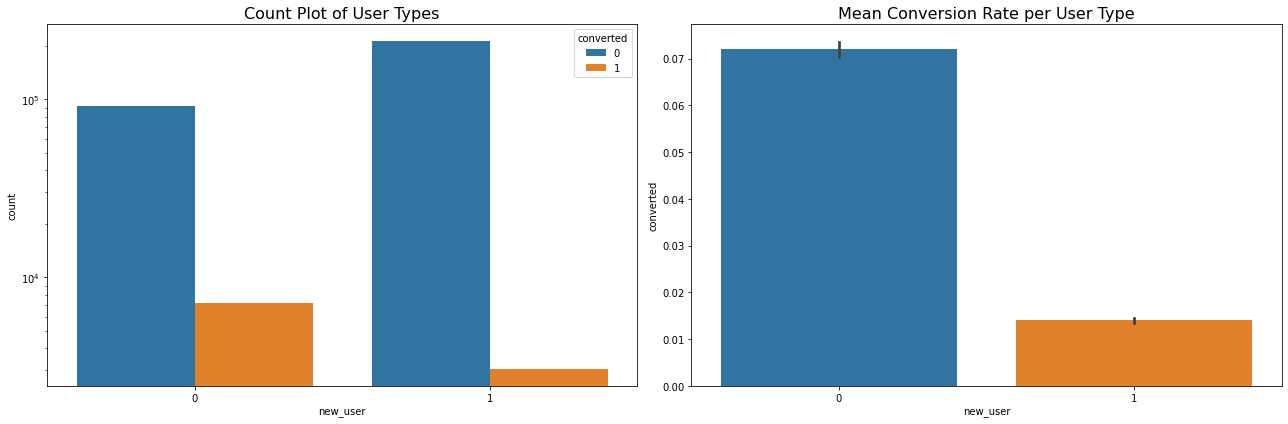

In [33]:
# Visualization of different user types
grouped = df[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()


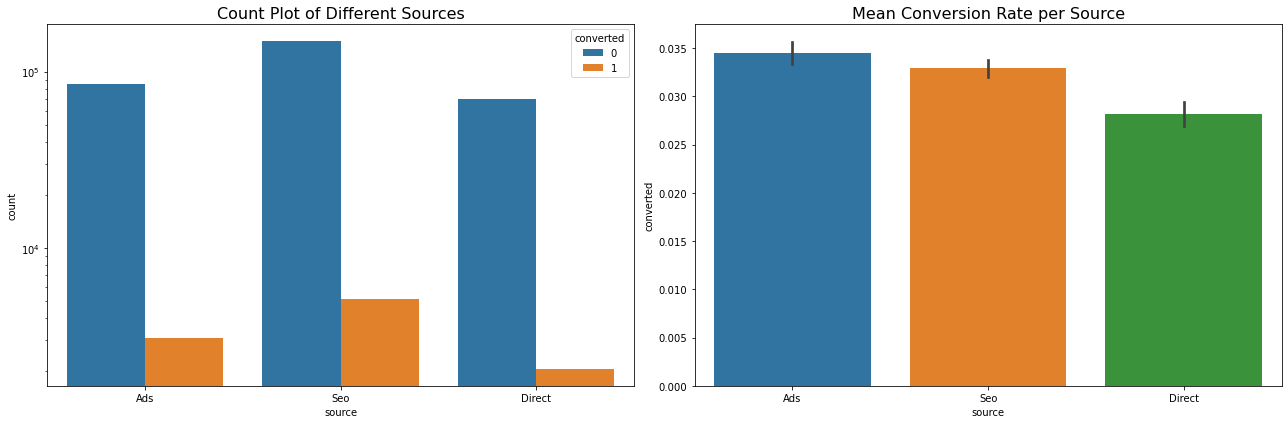

In [34]:
# Visualization of different sources
grouped = df[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=df
            , ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

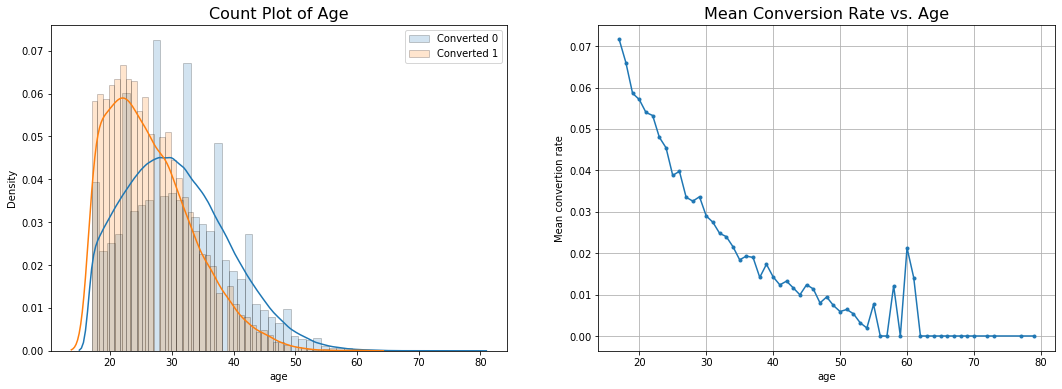

In [35]:
# Visualization of different sources
grouped = df[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()


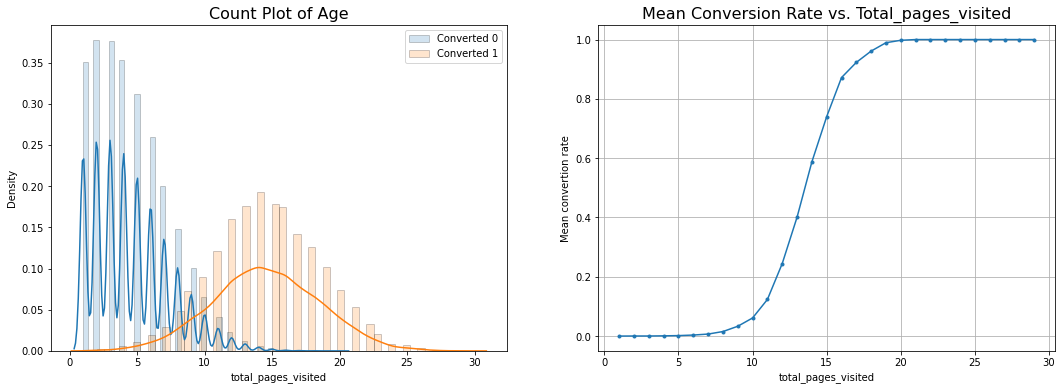

In [36]:
# Visualization of different sources
grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

## Machine Learning 

In [44]:
#Use one-hot-encoding to transform the categorical features into numerical values
X = df.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)# OHE those categorical features


In [45]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [47]:
y = df.converted
y.mean()

0.03225194340255157

In [48]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.333)

In [49]:
ytrain.mean(),ytest.mean()

(0.032275348025642, 0.03220506391627253)

In [50]:
lrcv = LogisticRegressionCV(Cs = np.logspace(-3,3,7),
                            dual=False,
                            scoring='roc_auc',
                            max_iter=1000,
                            n_jobs=-1,
                            verbose=1)
lrcv.fit(Xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.6s finished


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                     max_iter=1000, n_jobs=-1, scoring='roc_auc', verbose=1)

In [51]:
lrcv.C_

array([1000.])

In [52]:
lrcv.scores_

{1: array([[0.98256247, 0.9854015 , 0.98596684, 0.98596913, 0.98596367,
         0.98596373, 0.98596373],
        [0.98295299, 0.98605251, 0.98681961, 0.98689777, 0.98689985,
         0.98689985, 0.98689985],
        [0.98382512, 0.98620845, 0.98675471, 0.98681508, 0.98682226,
         0.98682226, 0.98682226],
        [0.97996826, 0.98313167, 0.98389274, 0.98397886, 0.98398663,
         0.98398663, 0.98398663],
        [0.9816029 , 0.98471017, 0.98550843, 0.98559477, 0.98560458,
         0.98560458, 0.98560458]])}

In [53]:
lrcv.score(Xtrain,ytrain)

0.9858958671168635

In [54]:
lrcv.score(Xtest,ytest)

0.9863463564104956

In [55]:
1 - ytest.mean()

0.9677949360837275

In [58]:
ytest_predict = lrcv.predict(Xtest)
print(classification_report(y_true=ytest,y_pred=ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    101903
           1       0.86      0.69      0.77      3391

    accuracy                           0.99    105294
   macro avg       0.92      0.84      0.88    105294
weighted avg       0.99      0.99      0.99    105294



In [59]:
feat_importances = pd.DataFrame({"name":Xtrain.columns,"coef":lrcv.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-2.670833,2.670833
1,new_user,-1.715275,1.715275
4,country_Germany,1.139386,1.139386
5,country_UK,0.849227,0.849227
2,total_pages_visited,0.758213,0.758213
6,country_US,0.491209,0.491209
8,source_Direct,-0.153489,0.153489
0,age,-0.071582,0.071582
9,source_Seo,-0.028572,0.028572
7,source_Ads,-0.008950,0.008950


Some conclusions and suggestions:
1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use marketing channel which are more likely to reach young people.
2. The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.
3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.
4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, some payment issue or maybe it is just in English! Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
5. Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion clearly starts dropping.
6. If I know someone has visited many pages, but hasn’t converted, she almost surely has high purchase intent. I could email her targeted offers or sending her reminders. Overall, these are probably the easiest users to make convert.
